# MA Remove Water Issue

This notebook demonstrates a curious case where `remove_water=True` produces
curious effects for some counties in the state, removing large areas of land
that are definitely not water.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import ACS5
from censusdis.states import MA, CT, RI, NH, NAMES_FROM_IDS

In [2]:
# Try also CT, RI, NH. Those all seem to look better.
STATE = MA

Load county level data with and without removing water.

In [3]:
gdf_county = ced.download(
    ACS5,
    2020,
    ["NAME"],
    state=STATE,
    county="*",
    with_geometry=True,
)

In [4]:
gdf_county_remove_water = ced.download(
    ACS5,
    2020,
    ["NAME"],
    state=STATE,
    county="*",
    with_geometry=True,
    remove_water=True,
)

Plot both of them. Notice that in the `remove_water=True` case a lot of land
that is not water got removed.

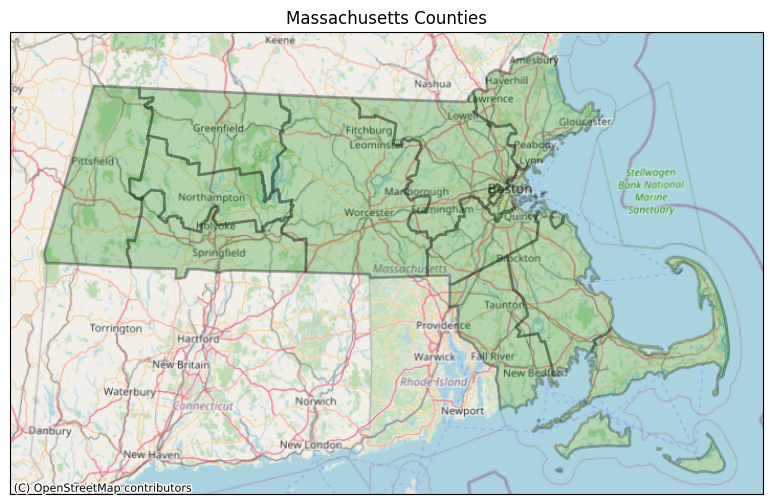

In [5]:
ax = cem.plot_map(
    gdf_county,
    color="green",
    alpha=0.25,
    edgecolor="black",
    linewidth=2,
    with_background=True,
    figsize=(12, 6),
)

_ = ax.set_title(f"{NAMES_FROM_IDS[STATE]} Counties")

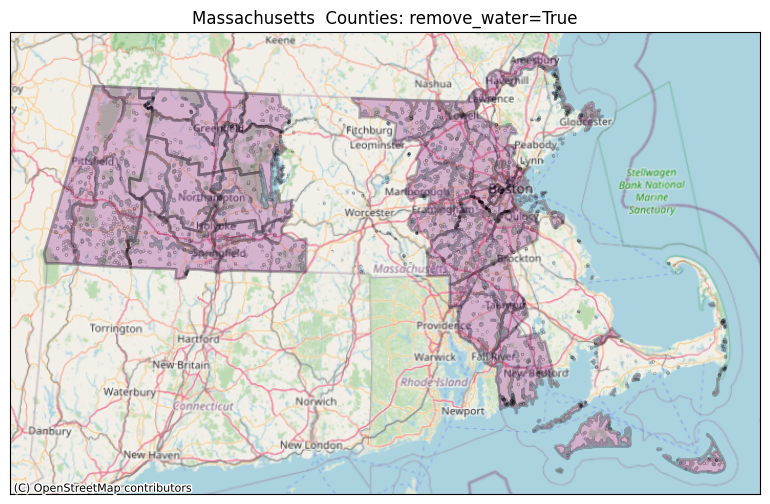

In [6]:
ax = cem.plot_map(
    gdf_county_remove_water,
    color="purple",
    alpha=0.25,
    edgecolor="black",
    linewidth=2,
    with_background=True,
    figsize=(12, 6),
)

_ = ax.set_title(f"{NAMES_FROM_IDS[STATE]}  Counties: remove_water=True")

## Water Shapefile for Debugging?

Now we are going to go behind the scenes and load the water shapefile for one
county from the local cache. We chose Worchester County because that is one that
`remove_water=True` totally removes. It looks like it has lots of lakes, but there
is no obvious reason why it would remove the whole county when used as a mask.

In [7]:
import geopandas as gpd

In [8]:
gdf_worchester_shapefile = gpd.read_file(
    "~/.censusdis/data/shapefiles/tl_2020_25027_areawater"
)

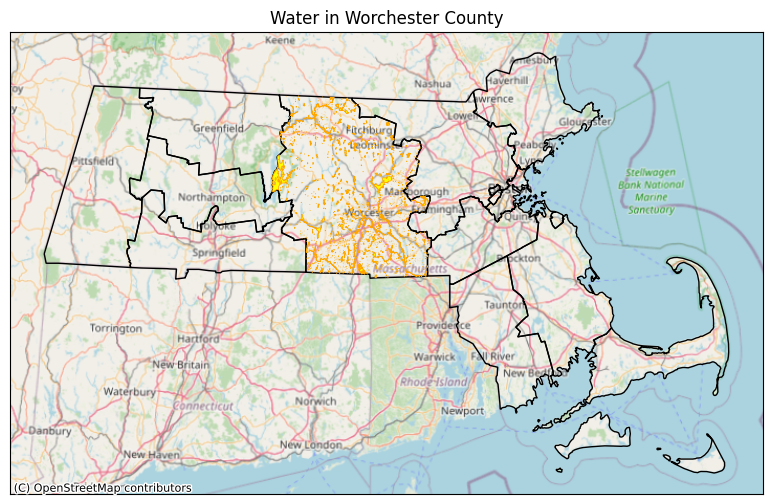

In [9]:
ax = cem.plot_map(
    gdf_county,
    color="#00000000",
    edgecolor="black",
    linewidth=1,
    with_background=True,
    figsize=(12, 6),
)

ax = cem.plot_map(
    gdf_worchester_shapefile, color="yellow", edgecolor="orange", linewidth=0.5, ax=ax
)

_ = ax.set_title("Water in Worchester County")